In [1]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

0.408207385601


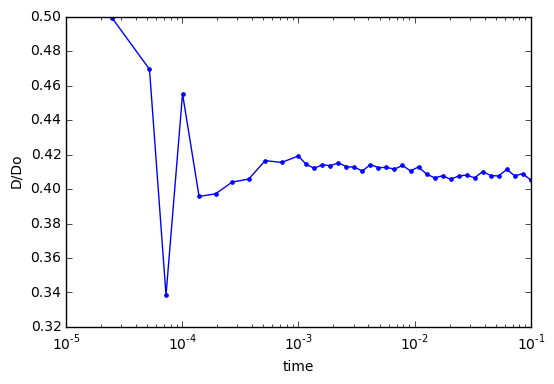

In [12]:
def plot1(out):
    t = out[:,0]
    msd = out[:,1]
    #print t
    #std = out[:,2]
    #plt.errorbar(t,msd,yerr=std,fmt='.-')
    plt.plot(t,msd,'.')
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(t,4*t)
    #plt.ylim(1e-9,1e-5)
    #plt.xlim(1e-9,1e-1)

def plot2(out):
    msd = out[:,1][1:]
    t=out[:,0][1:]
    #error = out[:,2][1:]/t/4.
    Deff = msd/t/4.
    #plt.errorbar(t,Deff,yerr=error,fmt='.',label=nam)
    plt.plot(t,Deff,'.-')
    #plt.ylim(0.65,0.75)
    #plt.yticks(np.arange(0.5,1,0.1))
    #plt.grid()
    plt.xlabel("time")
    plt.ylabel("D/Do")
    plt.legend()
    plt.xscale('log')
    #plt.yscale('log')
    #plt.plot(np.logspace(-5,0,10),[0.574]*10,'-')
    print np.mean(Deff[(t>1e-2)])

plot2(out)

loading from  Dratio/D1.0/phi0.5/
0.5
norun 100
save in data/2DLS_mob_Dratio1.0phi0.5.csv
0.410003712077


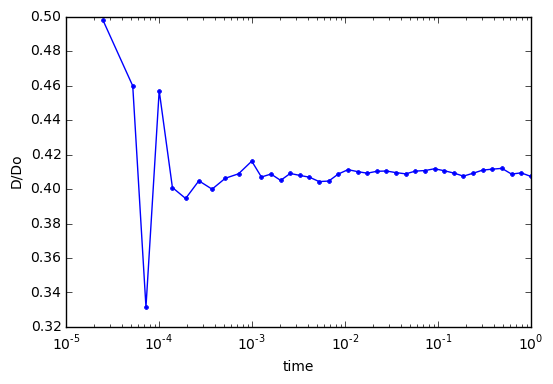

In [13]:
phis= [0.5]#[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9]
Dratio = 1.
def getmsd(phi,nam):
    print phi
    dat = np.loadtxt('data/'+nam+'LS2Dmoc_phi'+str(phi)+'_D'+str(Dratio)+'run0.csv',delimiter=',')
    msd = np.zeros(dat.shape[0])
    namelist = os.listdir("data/"+nam)
    norun = len(namelist)
    print 'norun',norun
    datm =[]
    delist = []
    for na in namelist:
        name = 'data/'+nam+na
        #name = 'data/'+nam+'LS2Dmoc_phi'+str(phi)+'_D'+str(Dratio)+'run'+str(run)+'.csv'
        dat = np.loadtxt(name,delimiter=',')
        t = dat[:,0]
        #plt.loglog(t,dat[:,1],'-')
        #plt.xlim(1e-3,1)
        #plt.ylim(1e-3,1)
        datm.append(dat[:,1])
        deff = dat[:,1][1:]/t[1:]/4
        delist.append(np.mean(deff[(t[1:]>2e-1)]))
    mean = np.mean(datm,axis=0)
    var = np.mean((datm-mean)**2,axis=0)
    #std = np.sqrt(var)
    t = dat[:,0]
    out = np.column_stack((t,mean))        
    name = 'data/2DLS_mob_Dratio'+str(Dratio)+'phi'+str(phi)+'.csv'
    #filename = open(name,'w')
    #np.savetxt(filename,out,delimiter=',',fmt='%s')
    #filename.close()
    print 'save in '+name
    return out,[np.mean(delist),np.std(delist)]
stats = []
for phi in phis:
    for nam in ['Dratio/D'+str(Dratio)+'/phi'+str(phi)+'/']:
        print 'loading from ',nam
        out,stat = getmsd(phi,nam)
        stats.append(stat)
        plot2(out)

[0.85319029810440894, 0.72283995180998417, 0.58588010424518544, 0.47781471605600195, 0.36620479849166804, 0.2710701744024272, 0.18578182255484946, 0.04970904972640109]
[0.052626560129530431, 0.04038461497468436, 0.02750402640022458, 0.025866619627462832, 0.017128627804426689, 0.015515136126742988, 0.0098861878261673076, 0.0026249963328859515]


<Container object of 3 artists>

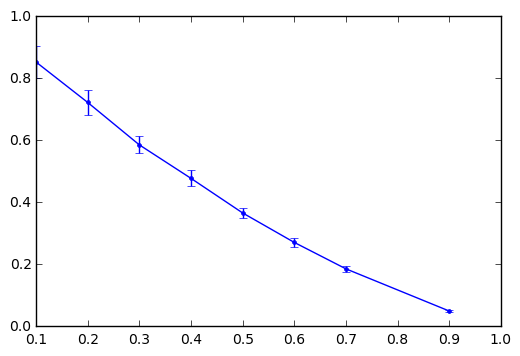

In [83]:
demean,destd = zip(*stats)
print list(demean)
print list(destd)
plt.errorbar(phis,demean,yerr=destd,fmt='.-')

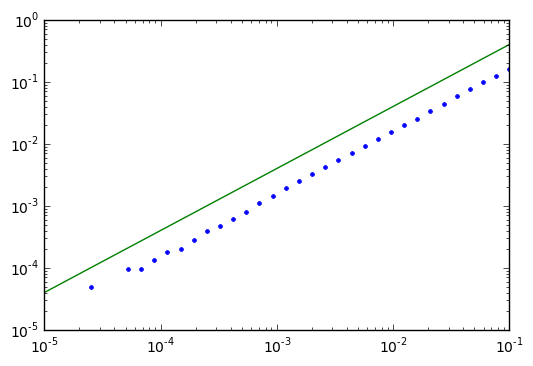

In [9]:
plot1(out)


/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/chew/.local/lib/python2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 31 but corresponding boolean dimension is 30
/usr/local/lib/python2.7/dist-packages/numpy-1.12.0-py2.7-linux-x86_64.egg/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy-1.12.0-py2.7-linux-x86_64.egg/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan


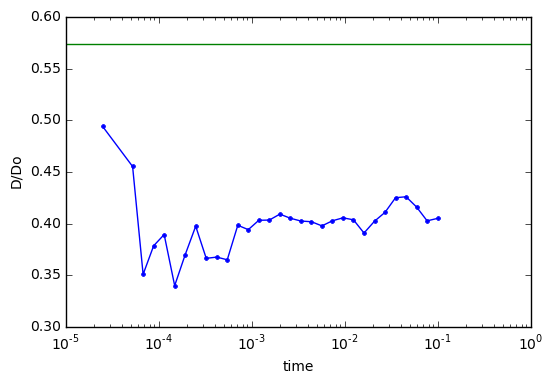

In [10]:
plot2(out)

In [6]:
def getmsd(phi):
    print phi
    msd = np.zeros(100001)
    norun = 50
    for i in range(norun):
        print i
        #dat = np.loadtxt('data/LSphi'+str(phi)+'/2Dcrowding_LS_phi'+str(phi)+'.csv',delimiter=',')
        dat = np.loadtxt('data/LSphi'+str(phi)+'/phi'+str(phi)+'run_'+str(i)+'.csv',delimiter=',')
        #t = dat[:,0]
        msd += dat[:,1]
    t = dat[:,0]
    msd /= norun
    name = 'data/LSphi'+str(phi)+'/2Dcrowding_LS_phi'+str(phi)+'.csv'
    filename = open(name,'w')
    np.savetxt(filename,np.column_stack((t,msd)),delimiter=',',fmt='%s')
    filename.close()
    
phis=[0.2,0.3,0.4,0.45]
    
for phi in phis:
    getmsd(phi)

0.2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0.3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0.4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0.45
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


2.5e-05


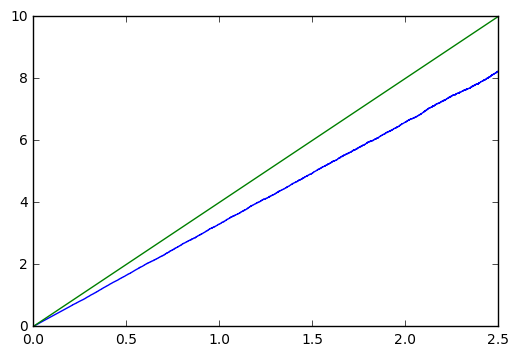

In [7]:
D = 1

plt.plot(t,msd)
plt.plot(t,4*D*t)
print t[1]


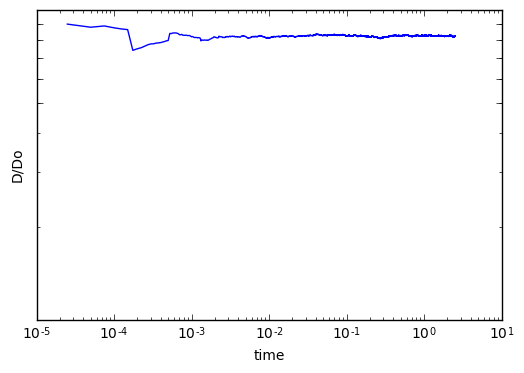

In [8]:
Deff = msd[1:]/t[1:]/4/D
plt.loglog(t[1:],Deff)
#plt.ylim(0.5,1.)
plt.yticks(np.arange(0.5,1,0.1))
#plt.grid()
plt.xlabel("time")
plt.ylabel("D/Do")

In [23]:
print np.mean(Deff[-100:])

0.909246106238


In [ ]:
/home/chew/runscript/data/LSphi0.4
